In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# load dataset
col_names = ['pH', 'EC mS/cm', 'N_NO3 ppm', 'P ppm', 'K ppm', 'Class']
feature_cols = ['pH', 'EC mS/cm', 'N_NO3 ppm', 'P ppm', 'K ppm']
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/soildatanew.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm,Class
0,1,5.16,0.274,14.46,18.61,147,Tidak Optimal
1,2,6.07,0.355,14.59,32.74,180,Optimal
2,3,6.92,0.675,14.91,19.02,183,Optimal
3,4,7.70,0.355,4.21,6.28,116,Tidak Optimal
4,5,7.61,0.392,6.11,6.55,228,Tidak Optimal
...,...,...,...,...,...,...,...
776,777,6.72,0.454,7.66,20.67,395,Optimal
777,778,7.79,0.343,5.20,4.14,286,Tidak Optimal
778,779,7.63,1.135,17.13,6.90,582,Tidak Optimal
779,780,7.73,0.393,3.92,7.93,335,Tidak Optimal


In [ ]:
# Konversi EC
df['EC mS/cm']=df['EC mS/cm']*1000
df['EC mS/cm'].describe()

count     781.000000
mean      452.792574
std       304.840569
min       134.000000
25%       338.000000
50%       404.000000
75%       497.000000
max      5621.000000
Name: EC mS/cm, dtype: float64

In [ ]:
df = df.drop(['ID'], axis=1)

In [ ]:
df

,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm,Class
0,5.16,274.0,14.46,18.61,147,Tidak Optimal
1,6.07,355.0,14.59,32.74,180,Optimal
2,6.92,675.0,14.91,19.02,183,Optimal
3,7.70,355.0,4.21,6.28,116,Tidak Optimal
4,7.61,392.0,6.11,6.55,228,Tidak Optimal
...,...,...,...,...,...,...
776,6.72,454.0,7.66,20.67,395,Optimal
777,7.79,343.0,5.20,4.14,286,Tidak Optimal
778,7.63,1135.0,17.13,6.90,582,Tidak Optimal
779,7.73,393.0,3.92,7.93,335,Tidak Optimal


In [ ]:
X = df.iloc[:,0:5] # Features
Y = pd.DataFrame(df['Class']) # Target variable

In [ ]:
X

,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm
0,5.16,274.0,14.46,18.61,147
1,6.07,355.0,14.59,32.74,180
2,6.92,675.0,14.91,19.02,183
3,7.70,355.0,4.21,6.28,116
4,7.61,392.0,6.11,6.55,228
...,...,...,...,...,...
776,6.72,454.0,7.66,20.67,395
777,7.79,343.0,5.20,4.14,286
778,7.63,1135.0,17.13,6.90,582
779,7.73,393.0,3.92,7.93,335


In [ ]:
# Normalisasi
sc = MinMaxScaler(feature_range=(0, 1))
X_Normalize = pd.DataFrame(data=sc.fit_transform(X),columns=feature_cols)

In [ ]:
# Gabung data yg telah di normalisasi dg classnya
data1 = pd.merge(X_Normalize, Y, left_index=True, right_index=True)

In [ ]:
data1

,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm,Class
0,0.180593,0.025515,0.118546,0.115890,0.070991,Tidak Optimal
1,0.425876,0.040277,0.119625,0.209250,0.091187,Optimal
2,0.654987,0.098597,0.122281,0.118599,0.093023,Optimal
3,0.865229,0.040277,0.033455,0.034424,0.052020,Tidak Optimal
4,0.840970,0.047020,0.049228,0.036207,0.120563,Tidak Optimal
...,...,...,...,...,...,...
776,0.601078,0.058320,0.062095,0.129501,0.222766,Optimal
777,0.889488,0.038090,0.041674,0.020284,0.156059,Tidak Optimal
778,0.846361,0.182431,0.140711,0.038520,0.337209,Tidak Optimal
779,0.873315,0.047202,0.031048,0.045325,0.186047,Tidak Optimal


In [ ]:
#Split data optimal dan Tidak Optimal
data_optimal = data1[data1['Class'] == 'Optimal']
data_tidak_optimal = data1[data1['Class'] == 'Tidak Optimal']

In [ ]:
data_tidak_optimal

,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm,Class
0,0.180593,0.025515,0.118546,0.115890,0.070991,Tidak Optimal
3,0.865229,0.040277,0.033455,0.034424,0.052020,Tidak Optimal
4,0.840970,0.047020,0.049228,0.036207,0.120563,Tidak Optimal
7,0.326146,0.013851,0.038187,0.072877,0.146267,Tidak Optimal
13,0.889488,0.057226,0.033455,0.010572,0.044676,Tidak Optimal
...,...,...,...,...,...,...
775,0.870620,0.053946,0.034368,0.027354,0.257650,Tidak Optimal
777,0.889488,0.038090,0.041674,0.020284,0.156059,Tidak Optimal
778,0.846361,0.182431,0.140711,0.038520,0.337209,Tidak Optimal
779,0.873315,0.047202,0.031048,0.045325,0.186047,Tidak Optimal


In [ ]:
df1 = pd.concat([data_optimal, data_tidak_optimal])
x1 = df.drop(labels=['Class'], axis=1) #variabel fitur
y1= df['Class'] #variabel kelas

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=0, stratify=y1)

In [ ]:
y_test

82     Tidak Optimal
83           Optimal
367    Tidak Optimal
666          Optimal
124          Optimal
           ...      
744    Tidak Optimal
467    Tidak Optimal
420          Optimal
545    Tidak Optimal
740          Optimal
Name: Class, Length: 196, dtype: object

In [ ]:
df_optimal_train = data_optimal.iloc[0:190]
df_optimal_test = data_optimal.iloc[191:339]
df_tidak_optimal_train = data_tidak_optimal.iloc[0:190]
df_tidak_optimal_test = data_tidak_optimal.iloc[191:339]

In [ ]:
train = [df_optimal_train, df_tidak_optimal_train]
data_train = pd.concat(train)
test = [df_optimal_test, df_tidak_optimal_test]
data_test = pd.concat(test)

In [ ]:
data_train

,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm,Class
1,0.425876,0.040277,0.119625,0.209250,0.091187,Optimal
2,0.654987,0.098597,0.122281,0.118599,0.093023,Optimal
5,0.541779,0.039184,0.048481,0.087479,0.122399,Optimal
6,0.533693,0.153271,0.293707,0.088404,0.093023,Optimal
8,0.423181,0.024057,0.027644,0.059134,0.109547,Optimal
...,...,...,...,...,...,...
563,0.876011,0.052488,0.146522,0.052924,0.181151,Tidak Optimal
564,0.870620,0.078003,0.195501,0.022398,0.119339,Tidak Optimal
566,0.301887,0.020412,0.116968,0.130162,0.146879,Tidak Optimal
567,0.301887,0.016585,0.137805,0.146878,0.176255,Tidak Optimal


In [ ]:
XTrain = data_train[feature_cols]
YTrain = pd.DataFrame(data_train['Class'])
XTest = data_test[feature_cols]
YTest = pd.DataFrame(data_test['Class'])

In [ ]:
XTrain

,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm
1,0.425876,0.040277,0.119625,0.209250,0.091187
2,0.654987,0.098597,0.122281,0.118599,0.093023
5,0.541779,0.039184,0.048481,0.087479,0.122399
6,0.533693,0.153271,0.293707,0.088404,0.093023
8,0.423181,0.024057,0.027644,0.059134,0.109547
...,...,...,...,...,...
563,0.876011,0.052488,0.146522,0.052924,0.181151
564,0.870620,0.078003,0.195501,0.022398,0.119339
566,0.301887,0.020412,0.116968,0.130162,0.146879
567,0.301887,0.016585,0.137805,0.146878,0.176255


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = None, min_samples_split = 2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


Akurasi dengan menggunakan Decision Tree:  0.6178343949044586


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


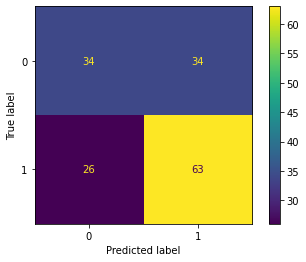

              precision    recall  f1-score   support

           0       0.57      0.50      0.53        68
           1       0.65      0.71      0.68        89

    accuracy                           0.62       157
   macro avg       0.61      0.60      0.60       157
weighted avg       0.61      0.62      0.61       157



In [ ]:
# Decision Tree dengan maximal kedalaman adalah 1 dan minimal jumlah sampel untuk dibentuk leaf baru adalah 2
dt = DecisionTreeClassifier(
  max_depth = 3,
  min_samples_split = 2
) #random_state=0, max_depth=2.  (*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Decision Tree: ", score)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(dt, X_test, y_test)  
plt.show()  

# Classification report
report = classification_report(y_test, y_pred)
# cek hasil matrix
print(report)

In [ ]:
clf

DecisionTreeClassifier(max_depth=3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


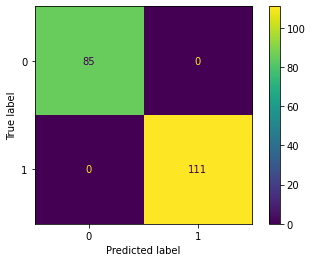

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       254
           1       0.79      0.84      0.81       331

    accuracy                           0.78       585
   macro avg       0.78      0.78      0.78       585
weighted avg       0.78      0.78      0.78       585



0.5510204081632653

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
report = classification_report(y_train, y_pred)

matrix = confusion_matrix(y_train, y_pred)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

print(report)
knn.score(X_test, y_test)

ANN

Akurasi dengan menggunakan Nearest Neighbor:  0.5668789808917197


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


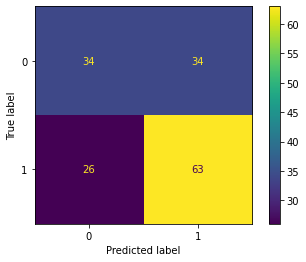

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.57      1.00      0.72        89

    accuracy                           0.57       157
   macro avg       0.28      0.50      0.36       157
weighted avg       0.32      0.57      0.41       157



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3), random_state=1)

mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

#akurasi
score = metrics.accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan Nearest Neighbor: ", score)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(dt, X_test, y_test)  
plt.show()  

# Classification report
report = classification_report(y_test, y_pred)
# cek hasil matrix
print(report)


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['Class'] = labelencoder.fit_transform(df['Class'])

In [ ]:
X = df.iloc[:,1:5]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [ ]:
X

,EC mS/cm,N_NO3 ppm,P ppm,K ppm
0,274.0,14.46,18.61,147
1,355.0,14.59,32.74,180
2,675.0,14.91,19.02,183
3,355.0,4.21,6.28,116
4,392.0,6.11,6.55,228
...,...,...,...,...
776,454.0,7.66,20.67,395
777,343.0,5.20,4.14,286
778,1135.0,17.13,6.90,582
779,393.0,3.92,7.93,335


In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np





train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)


model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(4,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, train_labels,epochs=64,batch_size=5)
model.summary()


Epoch 1/64
125/125 [==============================] - 1s 2ms/step - loss: 3.4688 - acc: 0.5497
Epoch 2/64
125/125 [==============================] - 0s 2ms/step - loss: 3.3188 - acc: 0.4952
Epoch 3/64
125/125 [==============================] - 0s 2ms/step - loss: 1.9118 - acc: 0.5321
Epoch 4/64
125/125 [==============================] - 0s 2ms/step - loss: 1.6393 - acc: 0.5048
Epoch 5/64
125/125 [==============================] - 0s 2ms/step - loss: 1.4218 - acc: 0.5288
Epoch 6/64
125/125 [==============================] - 0s 2ms/step - loss: 1.2484 - acc: 0.5433
Epoch 7/64
125/125 [==============================] - 0s 2ms/step - loss: 1.4968 - acc: 0.5465
Epoch 8/64
125/125 [==============================] - 0s 2ms/step - loss: 0.9064 - acc: 0.5112
Epoch 9/64
125/125 [==============================] - 0s 2ms/step - loss: 0.8475 - acc: 0.5641
Epoch 10/64
125/125 [==============================] - 0s 2ms/step - loss: 0.9564 - acc: 0.5449
Epoch 11/64
125/125 [============================

In [ ]:
df

,pH,EC mS/cm,N_NO3 ppm,P ppm,K ppm,Class
0,5.16,274.0,14.46,18.61,147,Tidak Optimal
1,6.07,355.0,14.59,32.74,180,Optimal
2,6.92,675.0,14.91,19.02,183,Optimal
3,7.70,355.0,4.21,6.28,116,Tidak Optimal
4,7.61,392.0,6.11,6.55,228,Tidak Optimal
...,...,...,...,...,...,...
776,6.72,454.0,7.66,20.67,395,Optimal
777,7.79,343.0,5.20,4.14,286,Tidak Optimal
778,7.63,1135.0,17.13,6.90,582,Tidak Optimal
779,7.73,393.0,3.92,7.93,335,Tidak Optimal


In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Text(0, 0.5, 'Class')

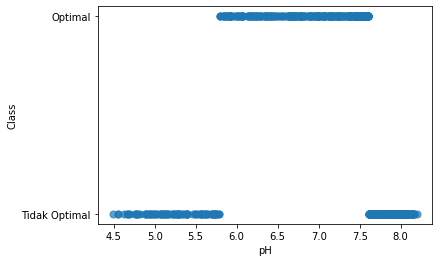

In [ ]:
x = df.iloc[:, 0]
y = df['Class']
plt.scatter(x, y, s=50, alpha=0.7)
plt.xlabel('pH')
plt.ylabel('Class')

In [ ]:
value = [6.92, 675, 14.91, 19.02, 183]
pred = clf.predict([value])
print(pred)

['Tidak Optimal']


In [ ]:
value = [0.42587601078167125, 0.04027701840714416, 0.11962477170845094, 0.20925008259002315, 0.09118727050183598]
pred = clf.predict([value])
print(pred)

In [ ]:
import numpy as np
value = [6.92, 675, 14.91, 19.02, 183]
np.array(value)

array([  6.92, 675.  ,  14.91,  19.02, 183.  ])

In [ ]:
sc.transform([value])
pred = clf.predict([value])
print(pred)

['Tidak Optimal']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
